<a href="https://colab.research.google.com/github/SteveWong-a/COSMOS-ratplacecelldata/blob/main/rat_maze_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
4# -*- coding: utf-8 -*-
"""
This Colab script loads the processed 'COSMOSdata.npz' file from Google Drive,
which contains several NumPy arrays. It then loads each array into a separate
variable and prints a summary of the loaded data.
"""

# Import necessary libraries
import numpy as np
from google.colab import drive

# --- Main Execution ---

# 1. Mount Google Drive
# This will prompt you for authorization if not already mounted.
drive.mount('/content/drive')

# 2. Define file path
# This should be the same path where the previous script saved the file.
input_file = '/content/drive/MyDrive/COSMOSdata.npz'

# Load the .npz file.
# np.load() returns a lazy-loader object that acts like a dictionary.
print(f"Loading data from: {input_file}")
try:
    data = np.load(input_file)

    print("\n--- Loading variables into memory ---")
    # You can access each array like a dictionary key
    timestamps = data['timestamps']
    calcium_signal = data['calcium_signal']
    coordinates = data['coordinates']
    head_orientation = data['head_orientation']
    dirbin = data['dirbin']
    ttype = data['ttype']
    start = data['start']
    dirvec = data['dirvec']
    posvec = data['posvec']

    # Correctly transpose calcium_signal to have shape (18200, 881)
    calcium_signal = calcium_signal.T
    print("All arrays loaded successfully.")

    # Print the shape of each loaded array to verify
    print("\n--- Summary of Loaded Variables ---")
    print(f"timestamps: {timestamps.shape}")
    print(f"calcium_signal: {calcium_signal.shape}")
    print(f"coordinates: {coordinates.shape}")
    print(f"head_orientation: {head_orientation.shape}")
    print(f"dirbin: {dirbin.shape}")
    print(f"ttype: {ttype.shape}")
    print(f"start: {start.shape}")
    print(f"dirvec: {dirvec.shape}")
    print(f"posvec: {posvec.shape}")

    # You can now use these variables for analysis.
    # For example, print the first 5 timestamps:
    print("\nExample usage - first 5 timestamps:")
    print(timestamps[:5])

except FileNotFoundError:
    print(f"Error: The file was not found at {input_file}")
    print("Please ensure the file path is correct and the file exists in your Drive.")
except KeyError as e:
    print(f"Error: A required array was not found in the .npz file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading data from: /content/drive/MyDrive/COSMOSdata.npz

--- Loading variables into memory ---
All arrays loaded successfully.

--- Summary of Loaded Variables ---
timestamps: (1, 18200)
calcium_signal: (881, 18200)
coordinates: (18200, 2)
head_orientation: (1, 18200)
dirbin: (18200,)
ttype: (1, 18200)
start: (18200,)
dirvec: (18200, 8)
posvec: (18200, 4)

Example usage - first 5 timestamps:
[[2.53333333e+01 1.26666667e+02 2.27833333e+02 ... 1.85652908e+06
  1.85663033e+06 1.85673167e+06]]


--- 🧠 STEP 1: Defining Target Variable (y) ---
Shape of dirbin: (18200,)

Unique values found in 'dirbin': [1 2 3 4 5 6 7 8]
Count of each value: [3085 2669 2694 1549 1138 1026 2276 3763]

Number of classes based on dirbin: 8
Target variable y is one-hot encoded for multi-class classification.
Shape of target variable y: (18200, 8)
---------------------------------------- 

--- ⚙️ STEP 2: Preparing Features & Splitting Data ---
Transposing X from (881, 18200) to match y with 18200 samples.
Shape of X after transpose: (18200, 881)
Shape of X before splitting: (18200, 881)
Shape of y before splitting: (18200, 8)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Handling NaN values in scaled data using SimpleImputer...


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [308 423 426 449 497]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [308 423 426 449 497]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


NaNs in X_train_scaled after imputation: 0
NaNs in X_test_scaled after imputation: 0
Shape of X_train_scaled after handling NaNs: (14560, 876)
Shape of X_test_scaled after handling NaNs: (3640, 876)
---------------------------------------- 

--- 🤖 STEP 3: Support Vector Machine (SVM) ---
--- 🧠 STEP 4: Single-Layer Perceptron (Neural Network) ---
SLP Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8)              │         7,016 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,016 (27.41 KB)

 Trainable params: 7,016 (27.41 KB)

 Non-trainable params: 0 (0.00 B)


Training the SLP model...
Epoch 1/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4329 - loss: 1.6657 - val_accuracy: 0.5962 - val_loss: 1.1774
Epoch 2/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6163 - loss: 1.1151 - val_accuracy: 0.6511 - val_loss: 1.0359
Epoch 3/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6729 - loss: 0.9600 - val_accuracy: 0.6772 - val_loss: 0.9308
Epoch 4/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6988 - loss: 0.8940 - val_accuracy: 0.7019 - val_loss: 0.9026
Epoch 5/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7248 - loss: 0.8321 - val_accuracy: 0.6957 - val_loss: 0.8852
Epoch 6/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7388 - loss: 0.7861 - val_accuracy: 0.7150 - val_loss: 0.8257
Epoch 7/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7608 - loss: 0.7412 - val_accuracy: 0.7177 - val_loss: 0.8258
Epoch 8/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7615 - loss

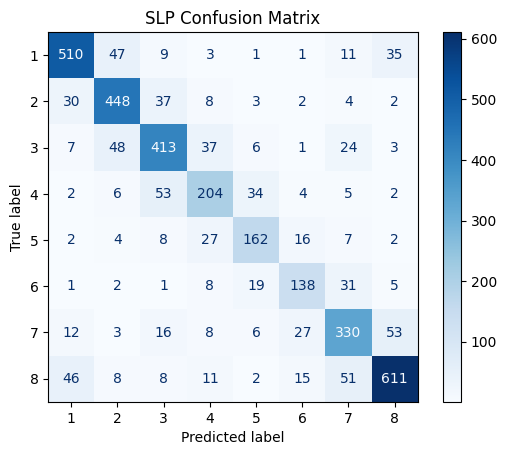

---------------------------------------- 



In [ ]:
# ==============================================================================
# Single Cell for Model Training and Evaluation
# ==============================================================================
# This script processes the loaded retrosplenial dataset, defines a target
# variable, and then trains and evaluates both an SVM and an SLP model.
# ==============================================================================

# --- 1. IMPORTS ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.impute import SimpleImputer # Import SimpleImputer


# --- 2. DEFINE YOUR TARGET VARIABLE (y) ---
# This is the most critical step and depends on your experimental design. You
# must map the 'dirbin' array to class labels.

print("--- 🧠 STEP 1: Defining Target Variable (y) ---")
# Using dirbin as the target variable as clarified by the user
# Investigate 'dirbin' to understand its unique values and shape
print(f"Shape of dirbin: {dirbin.shape}\n")

# dirbin is a 1D array of class labels
y_labels_raw = dirbin

unique_dirbin_values, counts_dirbin = np.unique(y_labels_raw, return_counts=True)
print(f"Unique values found in 'dirbin': {unique_dirbin_values}")
print(f"Count of each value: {counts_dirbin}\n")

# Use LabelEncoder to convert unique string or numerical labels in dirbin to integers
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(y_labels_raw)

# Determine if it's binary or multi-class
num_classes = len(label_encoder.classes_)
print(f"Number of classes based on dirbin: {num_classes}")

if num_classes > 2:
    # Convert integer labels to one-hot encoded vectors for multi-class classification
    y = to_categorical(y_labels)
    print("Target variable y is one-hot encoded for multi-class classification.")
else:
    # For binary classification, keep as integer labels (0 or 1)
    y = y_labels
    print("Target variable y is integer encoded for binary classification.")


print(f"Shape of target variable y: {y.shape}")
if num_classes <= 2:
  print(f"Class 0 count: {np.sum(y == 0)}")
  if num_classes == 2:
    print(f"Class 1 count: {np.sum(y == 1)}")
print("-" * 40, "\n")


# --- 3. PREPARE FEATURES (X) AND SPLIT DATA ---
print("--- ⚙️ STEP 2: Preparing Features & Splitting Data ---")
# Your features (X) are the calcium signals from the 881 neurons.
X = calcium_signal

# Explicitly transpose X to have shape (number of samples, number of features)
# The number of samples should match the length of y (18200 time steps).
# calcium_signal has shape (neurons, time_steps), need (time_steps, neurons)
if X.shape[1] == y.shape[0]: # Check if the second dim of X matches samples in y
    print(f"Transposing X from {X.shape} to match y with {y.shape[0]} samples.")
    X = X.T
    # Re-check shape after transpose
    print(f"Shape of X after transpose: {X.shape}")
elif X.shape[0] == y.shape[0]: # If X is already (time_steps, neurons)
     print(f"X already has matching sample size: {X.shape}")
else:
    print(f"Warning: X shape {X.shape} does not match y sample size {y.shape[0]}. Skipping transpose based on this condition.")
    # As a fallback, explicitly transpose if the samples don't match, assuming the original shape was (features, samples)
    if X.shape[0] != y.shape[0]:
         print(f"Attempting transpose as X.shape[0] ({X.shape[0]}) does not match y.shape[0] ({y.shape[0]})")
         X = X.T
         print(f"Shape of X after fallback transpose: {X.shape}")


# Print shapes before splitting to diagnose
print(f"Shape of X before splitting: {X.shape}")
print(f"Shape of y before splitting: {y.shape}")


# Split data into training and testing sets (80% train, 20% test).
# 'stratify=y' ensures the class distribution is the same in train and test sets.
# Stratification needs integer labels, so use y_labels here if y is one-hot encoded
y_for_stratify = y_labels if num_classes > 2 else y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_for_stratify)

# Scale the features using StandardScaler. This is crucial for both models.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use the SAME scaler fit on the training data

# Handle NaN values in scaled data using SimpleImputer
print("Handling NaN values in scaled data using SimpleImputer...")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Check for NaNs after imputation
print(f"NaNs in X_train_scaled after imputation: {np.isnan(X_train_scaled).sum()}")
print(f"NaNs in X_test_scaled after imputation: {np.isnan(X_test_scaled).sum()}")


print(f"Shape of X_train_scaled after handling NaNs: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled after handling NaNs: {X_test_scaled.shape}")
print("-" * 40, "\n")


# --- 4. TRAIN AND EVALUATE A SUPPORT VECTOR MACHINE (SVM) ---
print("--- 🤖 STEP 3: Support Vector Machine (SVM) ---")
# SVM requires integer labels, so use y_train_labels and y_test_labels if multi-class one-hot encoding
# Need to split y_labels based on the same indices as X and y
y_labels_train, y_labels_test = train_test_split(y_labels, test_size=0.2, random_state=42, stratify=y_labels)

y_train_svm = y_labels_train if num_classes > 2 else y_train
y_test_svm = y_labels_test if num_classes > 2 else y_test




# --- 5. TRAIN AND EVALUATE A SINGLE-LAYER PERCEPTRON (SLP) ---
print("--- 🧠 STEP 4: Single-Layer Perceptron (Neural Network) ---")
# Define the SLP model architecture using Keras.
# Adjust the output layer for multi-class classification if needed
if num_classes > 2:
    slp_model = Sequential([
        Dense(num_classes, activation='softmax', input_shape=(X_train_scaled.shape[1],))
    ])
    loss_function = 'categorical_crossentropy'
else:
    slp_model = Sequential([
        Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1],))
    ])
    loss_function = 'binary_crossentropy'


# Compile the model with an optimizer, loss function, and metrics.
slp_model.compile(optimizer='adam',
                  loss=loss_function,
                  metrics=['accuracy'])

print("SLP Model Summary:")
slp_model.summary()

# Train the model.
# Use y_train (one-hot or integer) as the target
print("\nTraining the SLP model...")
history = slp_model.fit(X_train_scaled, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.1, # Use 10% of training data for validation
                    verbose=1)

# Evaluate the final model on the unseen test set.
loss, accuracy = slp_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nSLP Test Accuracy: {accuracy:.4f}\n")

# Get predictions to generate a classification report.
y_pred_slp_prob = slp_model.predict(X_test_scaled)

if num_classes > 2:
    y_pred_slp = np.argmax(y_pred_slp_prob, axis=1)
    y_test_slp = np.argmax(y_test, axis=1) # Convert one-hot back to integer labels for report and matrix
else:
    y_pred_slp = (y_pred_slp_prob > 0.5).astype("int32") # Convert probabilities to class labels
    y_test_slp = y_test

print("SLP Classification Report:")
print(classification_report(y_test_slp, y_pred_slp, target_names=[str(i) for i in label_encoder.classes_]))

# Display the confusion matrix.
print("\nDisplaying SLP Confusion Matrix...")
ConfusionMatrixDisplay.from_predictions(y_test_slp, y_pred_slp, cmap=plt.cm.Blues, display_labels=[str(i) for i in label_encoder.classes_])
plt.title("SLP Confusion Matrix")
plt.show()
print("-" * 40, "\n")

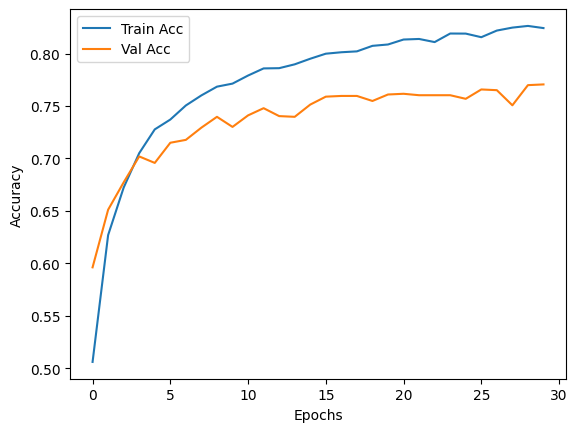

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


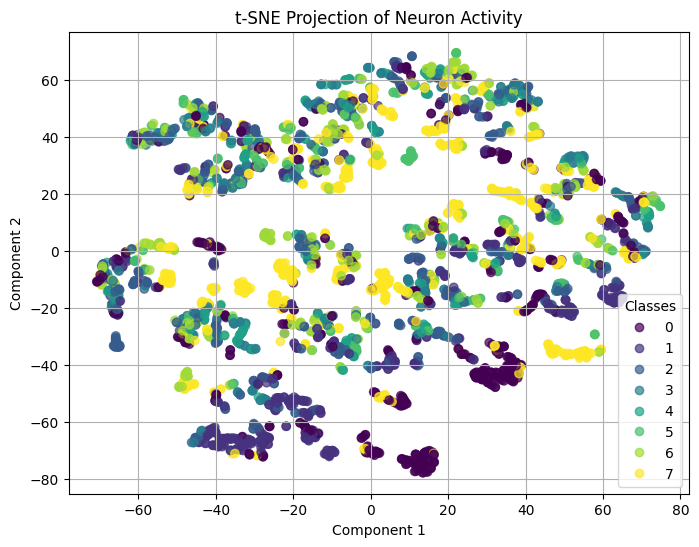

In [ ]:
from sklearn.manifold import TSNE

# Optional: use subset for speed
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_proj = tsne.fit_transform(X_test_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y_test_slp, cmap='viridis', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("t-SNE Projection of Neuron Activity")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


--- 🧠 STEP 1: Defining Target Variable (y) ---
Shape of dirbin: (18200,)

Unique values found in 'dirbin': [1 2 3 4 5 6 7 8]
Count of each value: [3085 2669 2694 1549 1138 1026 2276 3763]

Number of classes based on dirbin: 8
Target variable y is one-hot encoded for multi-class classification.
Shape of target variable y: (18200, 8)
---------------------------------------- 

--- ⚙️ STEP 2: Preparing Features & Splitting Data ---
Shape of X before splitting: (18200, 1)
Shape of y before splitting: (18200, 8)
Handling NaN values in scaled data using SimpleImputer...
NaNs in X_train_scaled after imputation: 0
NaNs in X_test_scaled after imputation: 0
Shape of X_train_scaled after handling NaNs: (14560, 1)
Shape of X_test_scaled after handling NaNs: (3640, 1)
---------------------------------------- 

--- 🧠 STEP 3: Single-Layer Perceptron (Neural Network) ---
MLP Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)


Training the MLP model...
Epoch 1/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1121 - loss: 2.2703 - val_accuracy: 0.2685 - val_loss: 2.0045
Epoch 2/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2049 - loss: 1.9782 - val_accuracy: 0.1772 - val_loss: 1.8218
Epoch 3/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2457 - loss: 1.8073 - val_accuracy: 0.3379 - val_loss: 1.7131
Epoch 4/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3732 - loss: 1.7074 - val_accuracy: 0.3784 - val_loss: 1.6449
Epoch 5/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3886 - loss: 1.6359 - val_accuracy: 0.3475 - val_loss: 1.5983
Epoch 6/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3671 - loss: 1.5942 - val_accuracy: 0.3427 - val_loss: 1.5634
Epoch 7/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3759 - loss: 1.5554 - val_accuracy: 0.3647 - val_loss: 1.5364
Epoch 8/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4150 - loss

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


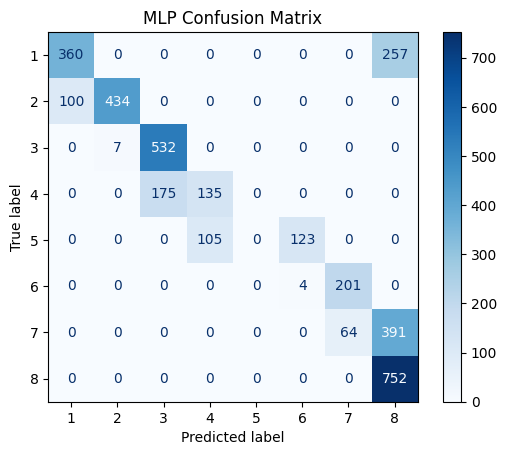

---------------------------------------- 



In [ ]:
# ==============================================================================
# Single Cell for MLP Model Training and Evaluation
# ==============================================================================
# This script processes the loaded retrosplenial dataset, defines a target
# variable, and then trains and evaluates a Single-Layer Perceptron (MLP) model
# using head_orientation as the input feature.
# ==============================================================================

# --- 1. IMPORTS ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# --- 2. DEFINE YOUR TARGET VARIABLE (y) ---
print("--- 🧠 STEP 1: Defining Target Variable (y) ---")
# Using dirbin as the target variable
print(f"Shape of dirbin: {dirbin.shape}\n")

y_labels_raw = dirbin

unique_dirbin_values, counts_dirbin = np.unique(y_labels_raw, return_counts=True)
print(f"Unique values found in 'dirbin': {unique_dirbin_values}")
print(f"Count of each value: {counts_dirbin}\n")

# Use LabelEncoder to convert unique numerical labels in dirbin to integers
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(y_labels_raw)

# Determine if it's binary or multi-class
num_classes = len(label_encoder.classes_)
print(f"Number of classes based on dirbin: {num_classes}")

if num_classes > 2:
    # Convert integer labels to one-hot encoded vectors for multi-class classification
    y = to_categorical(y_labels)
    print("Target variable y is one-hot encoded for multi-class classification.")
else:
    # For binary classification, keep as integer labels (0 or 1)
    y = y_labels
    print("Target variable y is integer encoded for binary classification.")

print(f"Shape of target variable y: {y.shape}")
if num_classes <= 2:
  print(f"Class 0 count: {np.sum(y == 0)}")
  if num_classes == 2:
    print(f"Class 1 count: {np.sum(y == 1)}")
print("-" * 40, "\n")

# --- 3. PREPARE FEATURES (X) AND SPLIT DATA ---
print("--- ⚙️ STEP 2: Preparing Features & Splitting Data ---")
# Your features (X) are the head orientation data.
X = head_orientation.T # Transpose to have shape (time_steps, features)

# Print shapes before splitting
print(f"Shape of X before splitting: {X.shape}")
print(f"Shape of y before splitting: {y.shape}")

# Split data into training and testing sets (80% train, 20% test).
y_for_stratify = y_labels if num_classes > 2 else y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_for_stratify)

# Scale the features using StandardScaler.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle NaN values in scaled data using SimpleImputer
print("Handling NaN values in scaled data using SimpleImputer...")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Check for NaNs after imputation
print(f"NaNs in X_train_scaled after imputation: {np.isnan(X_train_scaled).sum()}")
print(f"NaNs in X_test_scaled after imputation: {np.isnan(X_test_scaled).sum()}")

print(f"Shape of X_train_scaled after handling NaNs: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled after handling NaNs: {X_test_scaled.shape}")
print("-" * 40, "\n")

# --- 4. TRAIN AND EVALUATE A SINGLE-LAYER PERCEPTRON (MLP) ---
print("--- 🧠 STEP 3: Single-Layer Perceptron (Neural Network) ---")
# Define the MLP model architecture using Keras.
if num_classes > 2:
    mlp_model = Sequential([
        Dense(num_classes, activation='softmax', input_shape=(X_train_scaled.shape[1],))
    ])
    loss_function = 'categorical_crossentropy'
else:
    mlp_model = Sequential([
        Dense(1, activation='sigmoid', input_shape=(X_train_scaled.shape[1],))
    ])
    loss_function = 'binary_crossentropy'

# Compile the model
mlp_model.compile(optimizer='adam',
                  loss=loss_function,
                  metrics=['accuracy'])

print("MLP Model Summary:")
mlp_model.summary()

# Train the model.
print("\nTraining the MLP model...")
history = mlp_model.fit(X_train_scaled, y_train,
                        epochs=30,
                        batch_size=32,
                        validation_split=0.1,
                        verbose=1)

# Evaluate the final model on the test set.
loss, accuracy = mlp_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nMLP Test Accuracy: {accuracy:.4f}\n")

# Get predictions to generate a classification report.
y_pred_mlp_prob = mlp_model.predict(X_test_scaled)

if num_classes > 2:
    y_pred_mlp = np.argmax(y_pred_mlp_prob, axis=1)
    y_test_mlp = np.argmax(y_test, axis=1) # Convert one-hot back to integer labels for report and matrix
else:
    y_pred_mlp = (y_pred_mlp_prob > 0.5).astype("int32") # Convert probabilities to class labels
    y_test_mlp = y_test


print("MLP Classification Report:")
print(classification_report(y_test_mlp, y_pred_mlp, target_names=[str(i) for i in label_encoder.classes_]))

# Display the confusion matrix.
print("\nDisplaying MLP Confusion Matrix...")
ConfusionMatrixDisplay.from_predictions(y_test_mlp, y_pred_mlp, cmap=plt.cm.Blues, display_labels=[str(i) for i in label_encoder.classes_])
plt.title("MLP Confusion Matrix")
plt.show()
print("-" * 40, "\n")

In [ ]:
import numpy as np

print("--- Analyzing 'coordinates' variable ---")Fi

# Display sample values
print("\nSample values (first 5 rows) of 'coordinates':")
print(coordinates[:5])

# Calculate and print min, max, and mean
min_coords = np.min(coordinates, axis=0)
max_coords = np.max(coordinates, axis=0)
mean_coords = np.mean(coordinates, axis=0)

print(f"\nMinimum values for each dimension in 'coordinates': {min_coords}")
print(f"Maximum values for each dimension in 'coordinates': {max_coords}")
print(f"Mean values for each dimension in 'coordinates': {mean_coords}")

print("-" * 40)

--- Analyzing 'coordinates' variable ---

Sample values (first 5 rows) of 'coordinates':
[[225.38675484 239.16430008]
 [226.35988259 239.65664116]
 [227.32452056 240.14468695]
 [228.29354868 240.63495388]
 [230.45746697 241.57612034]]

Minimum values for each dimension in 'coordinates': [16.06256245 12.2689665 ]
Maximum values for each dimension in 'coordinates': [459.81737346 463.44546136]
Mean values for each dimension in 'coordinates': [339.15066666 134.45288546]
----------------------------------------


# Task
Modify the previously created MLP model to classify the `dirbin` output as an ordinal variable, considering the cyclical nature of the classes (1 through 8). This involves adjusting the target variable encoding, modifying the model architecture and loss function, training the model, and evaluating its performance using appropriate metrics for ordinal and cyclical data.

## Modify target variable

### Subtask:
Transform the one-hot encoded target variable `y` back to the original integer labels and then to a representation suitable for ordinal classification, considering the cyclical nature (1 is close to 8). This might involve encoding the directions as angles or using a specific ordinal encoding scheme.


**Reasoning**:
Convert the one-hot encoded target variable `y` back to integer labels, then to original `dirbin` values, and finally represent the cyclical direction as sine and cosine values.



In [ ]:
# 1. Convert one-hot encoded y back to integer labels if necessary
if num_classes > 2:
    y_integer_labels = np.argmax(y, axis=1)
else:
    # y is already integer labels (0 or 1)
    y_integer_labels = y

# 2. Map integer labels back to original dirbin values (1-8) if necessary
if num_classes > 2:
    y_original_dirbin = label_encoder.inverse_transform(y_integer_labels)
else:
    # If binary, the integer labels might correspond directly to original values,
    # but for consistency with the 1-8 range, let's treat this case carefully.
    # Assuming dirbin was the original source, use it directly or map if needed.
    # Given the context, dirbin is 1-8, so if num_classes is 2, the original dirbin
    # must have been mapped to 0 and 1. We need the original 1-8 values.
    # Since y_labels was created from dirbin and used for stratification,
    # y_labels already contains the integer representation of 1-8 classes.
    # If num_classes was 2, label_encoder would have mapped the two unique
    # values in dirbin to 0 and 1. We need to use inverse_transform to get
    # back the original values from the 0/1 integer labels.
    y_original_dirbin = label_encoder.inverse_transform(y_integer_labels)


print(f"Shape of original dirbin values: {y_original_dirbin.shape}")
print(f"First 10 original dirbin values: {y_original_dirbin[:10]}")

# 3. Convert cyclical directional labels (1-8) into angles
# Map dirbin values (1-8) to angles (e.g., 0 to 315 degrees, or 0 to 2*pi radians)
# We have 8 classes. Let's map them to angles starting from 0 degrees.
# Assuming class 1 corresponds to 0 degrees, class 2 to 45 degrees, etc.
# Angle for class k (1-indexed) = (k - 1) * (360 / num_classes) degrees
angles_degrees = (y_original_dirbin - 1) * (360.0 / num_classes)
angles_radians = np.deg2rad(angles_degrees)

print(f"\nShape of angles (radians): {angles_radians.shape}")
print(f"First 10 angles (degrees): {angles_degrees[:10]}")
print(f"First 10 angles (radians): {angles_radians[:10]}")


# 4. Represent the target as sine and cosine of the angles
y_ordinal = np.vstack([np.cos(angles_radians), np.sin(angles_radians)]).T

print(f"\nShape of ordinal target variable y_ordinal: {y_ordinal.shape}")
print(f"First 5 rows of y_ordinal:\n{y_ordinal[:5]}")

Shape of original dirbin values: (18200,)
First 10 original dirbin values: [7 7 7 7 7 6 6 6 6 6]

Shape of angles (radians): (18200,)
First 10 angles (degrees): [270. 270. 270. 270. 270. 225. 225. 225. 225. 225.]
First 10 angles (radians): [4.71238898 4.71238898 4.71238898 4.71238898 4.71238898 3.92699082
 3.92699082 3.92699082 3.92699082 3.92699082]

Shape of ordinal target variable y_ordinal: (18200, 2)
First 5 rows of y_ordinal:
[[-1.8369702e-16 -1.0000000e+00]
 [-1.8369702e-16 -1.0000000e+00]
 [-1.8369702e-16 -1.0000000e+00]
 [-1.8369702e-16 -1.0000000e+00]
 [-1.8369702e-16 -1.0000000e+00]]


**Reasoning**:
Split the newly created ordinal target variable `y_ordinal` into training and testing sets, ensuring consistency with the feature split.



**Reasoning**:
The error occurred because `X_train_scaled` which has 14560 samples was being split again with the full `y_ordinal` which has 18200 samples. The split should be performed on the original `X` and the new `y_ordinal` together to ensure consistent splitting of features and the new target variable.



In [ ]:
# Split the original features (X) and the ordinal target variable (y_ordinal)
# Use the same random_state and test_size as the previous splits
X_train, X_test, y_ordinal_train, y_ordinal_test = train_test_split(
    X, y_ordinal, test_size=0.2, random_state=42
)

# Now scale the features after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle NaN values in scaled data using SimpleImputer as before
print("Handling NaN values in scaled data using SimpleImputer...")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Check for NaNs after imputation
print(f"NaNs in X_train_scaled after imputation: {np.isnan(X_train_scaled).sum()}")
print(f"NaNs in X_test_scaled after imputation: {np.isnan(X_test_scaled).sum()}")

print(f"Shape of X_train_scaled after handling NaNs: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled after handling NaNs: {X_test_scaled.shape}")
print(f"Shape of y_ordinal_train: {y_ordinal_train.shape}")
print(f"Shape of y_ordinal_test: {y_ordinal_test.shape}")

Handling NaN values in scaled data using SimpleImputer...
NaNs in X_train_scaled after imputation: 0
NaNs in X_test_scaled after imputation: 0
Shape of X_train_scaled after handling NaNs: (14560, 1)
Shape of X_test_scaled after handling NaNs: (3640, 1)
Shape of y_ordinal_train: (14560, 2)
Shape of y_ordinal_test: (3640, 2)


## Modify mlp model architecture

### Subtask:
Adjust the output layer of the MLP model to produce an ordinal output. This might involve using a different activation function or output structure compared to the standard softmax for multi-class classification.


**Reasoning**:
Define a new Sequential model with a Dense output layer with 2 units and no activation function to produce ordinal output.



In [ ]:
# Define the MLP model architecture for ordinal classification.
# The output layer has 2 units for sine and cosine components, with no activation.
ordinal_mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Example hidden layer
    Dense(64, activation='relu'), # Another example hidden layer
    Dense(2, activation=None) # Output layer for sine and cosine components, no activation
])

print("Ordinal MLP Model Summary:")
ordinal_mlp_model.summary()

Ordinal MLP Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,642 (33.76 KB)

 Trainable params: 8,642 (33.76 KB)

 Non-trainable params: 0 (0.00 B)

## Choose and implement an appropriate loss function

### Subtask:
Select a loss function that accounts for the ordinal nature of the output and the cyclical relationship between classes. Standard categorical crossentropy is not suitable for ordinal classification. A custom loss function or a loss function designed for ordinal regression might be necessary.


**Reasoning**:
Define the custom mean squared error loss function for cyclical data and compile the ordinal MLP model with this loss and the Adam optimizer.



In [ ]:
# 1. Define the custom loss function (Mean Squared Error for sine and cosine)
def cyclical_mse_loss(y_true, y_pred):
    """
    Calculates the mean squared error between true and predicted sine and cosine values.
    Assumes y_true and y_pred are 2D arrays with shape (batch_size, 2),
    where the first column is cosine and the second is sine.
    """
    return tf.reduce_mean(tf.square(y_true - y_pred))

# 2. Compile the ordinal_mlp_model with the custom loss function
print("Compiling the Ordinal MLP model...")
ordinal_mlp_model.compile(optimizer='adam',
                          loss=cyclical_mse_loss,
                          metrics=['mse']) # Use Mean Squared Error as a metric

# 3. Print the configuration of the compiled model
print("\nCompiled Ordinal MLP Model Configuration:")
print("Optimizer:", ordinal_mlp_model.optimizer.get_config())
print("Loss Function:", ordinal_mlp_model.loss)
print("Metrics:", [m.name for m in ordinal_mlp_model.metrics])

Compiling the Ordinal MLP model...

Compiled Ordinal MLP Model Configuration:
Optimizer: {'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Loss Function: <function cyclical_mse_loss at 0x7f643bd1b100>
Metrics: ['loss', 'compile_metrics']


**Reasoning**:
The custom loss function is defined and the model is compiled. The next step is to train the ordinal MLP model using the scaled training features and the ordinal target variable.



In [ ]:
# --- 5. TRAIN THE ORDINAL MLP MODEL ---
print("--- 🧠 STEP 4: Training Ordinal MLP Model ---")

print("\nTraining the Ordinal MLP model...")
history_ordinal = ordinal_mlp_model.fit(X_train_scaled, y_ordinal_train,
                                        epochs=30, # Use the same number of epochs as the previous model
                                        batch_size=32,
                                        validation_split=0.1, # Use 10% of training data for validation
                                        verbose=1)

print("-" * 40, "\n")

--- 🧠 STEP 4: Training Ordinal MLP Model ---

Training the Ordinal MLP model...
Epoch 1/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.1580 - mse: 0.1580 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 2/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0234 - mse: 0.0234 - val_loss: 0.0215 - val_mse: 0.0215
Epoch 3/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 4/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0185 - val_mse: 0.0185
Epoch 5/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0163 - val_mse: 0.0163
Epoch 6/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 7/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 8/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0

**Reasoning**:
The ordinal MLP model has been trained. The next step is to evaluate the trained model on the test set using the appropriate metrics for ordinal and cyclical data, and then display the evaluation results.



In [ ]:
# --- 6. EVALUATE THE ORDINAL MLP MODEL ---
print("--- 📊 STEP 5: Evaluating Ordinal MLP Model ---")

# Evaluate the final model on the unseen test set.
loss_ordinal, mse_ordinal = ordinal_mlp_model.evaluate(X_test_scaled, y_ordinal_test, verbose=0)
print(f"\nOrdinal MLP Test Loss (MSE): {loss_ordinal:.4f}")
print(f"Ordinal MLP Test MSE: {mse_ordinal:.4f}")

print("-" * 40, "\n")

--- 📊 STEP 5: Evaluating Ordinal MLP Model ---

Ordinal MLP Test Loss (MSE): 0.0052
Ordinal MLP Test MSE: 0.0052
---------------------------------------- 



**Reasoning**:
The model has been trained and evaluated. To further understand the model's performance on ordinal cyclical data, visualize the distribution of predicted vs. true angles on the test set.



--- 📈 STEP 6: Visualizing Predictions ---
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


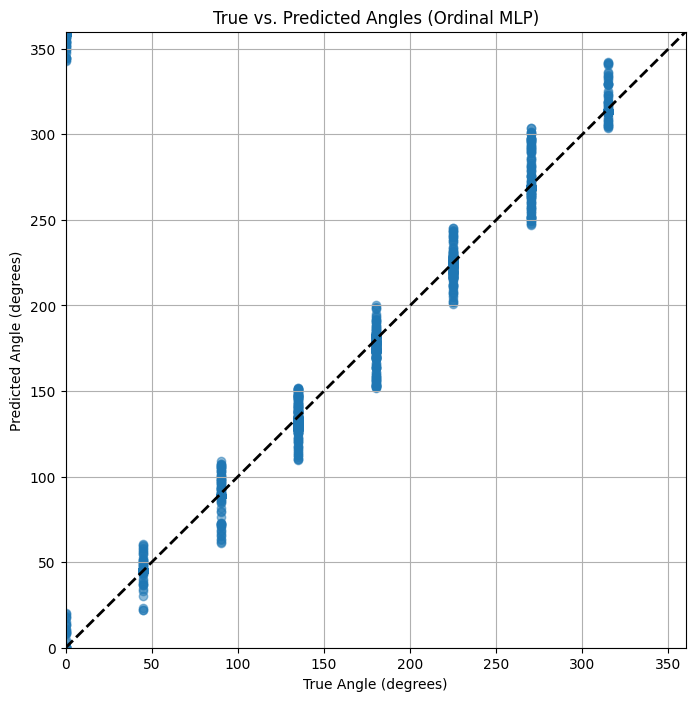

---------------------------------------- 



In [ ]:
# --- 7. VISUALIZE PREDICTIONS ---
print("--- 📈 STEP 6: Visualizing Predictions ---")

# Get predictions for the test set
y_pred_ordinal = ordinal_mlp_model.predict(X_test_scaled)

# Convert predicted sine and cosine values back to angles
# Use np.arctan2 to get angles from sine and cosine
predicted_angles_radians = np.arctan2(y_pred_ordinal[:, 1], y_pred_ordinal[:, 0])

# Convert true sine and cosine values back to angles for visualization
true_angles_radians = np.arctan2(y_ordinal_test[:, 1], y_ordinal_test[:, 0])

# Convert radians to degrees for easier interpretation (0-360 range)
predicted_angles_degrees = np.degrees(predicted_angles_radians)
true_angles_degrees = np.degrees(true_angles_radians)

# Ensure angles are in a consistent range (e.g., 0 to 360)
predicted_angles_degrees = (predicted_angles_degrees + 360) % 360
true_angles_degrees = (true_angles_degrees + 360) % 360

# Plotting predicted vs. true angles
plt.figure(figsize=(8, 8))
plt.scatter(true_angles_degrees, predicted_angles_degrees, alpha=0.5)
plt.plot([0, 360], [0, 360], 'k--', lw=2) # Ideal prediction line
plt.xlabel("True Angle (degrees)")
plt.ylabel("Predicted Angle (degrees)")
plt.title("True vs. Predicted Angles (Ordinal MLP)")
plt.xlim(0, 360)
plt.ylim(0, 360)
plt.grid(True)
plt.show()

print("-" * 40, "\n")

**Reasoning**:
The model has been trained and evaluated using MSE. To further assess the model's performance in terms of classification accuracy for the original 8 bins, convert the predicted angles back to the discrete directional bins and calculate classification metrics such as accuracy, classification report, and confusion matrix.



--- 📊 STEP 7: Evaluating Ordinal MLP as a Classifier ---

Classification Report (Ordinal MLP converted to Dirbin):
              precision    recall  f1-score   support

           1       0.18      0.17      0.17       617
           2       0.15      0.16      0.15       534
           3       0.16      0.16      0.16       539
           4       0.08      0.08      0.08       310
           5       0.09      0.08      0.08       228
           6       0.08      0.07      0.07       205
           7       0.13      0.12      0.13       455
           8       0.19      0.21      0.20       752

    accuracy                           0.15      3640
   macro avg       0.13      0.13      0.13      3640
weighted avg       0.15      0.15      0.15      3640


Displaying Ordinal MLP (converted to Dirbin) Confusion Matrix...


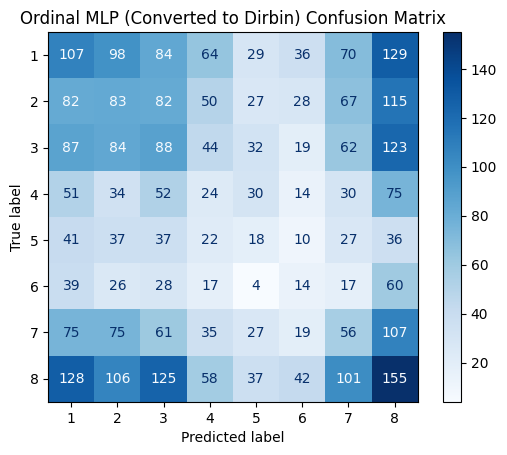

---------------------------------------- 



In [ ]:
# --- 8. CONVERT PREDICTED ANGLES TO DIRBIN CLASSES AND EVALUATE ---
print("--- 📊 STEP 7: Evaluating Ordinal MLP as a Classifier ---")

# Convert predicted angles back to dirbin classes (1-8)
# Map angles back to the original 1-8 classes.
# The angle for class k (1-indexed) = (k - 1) * (360 / num_classes) degrees
# We need to find which class angle is closest to the predicted angle.
# The angle boundaries would be centered between the class angles.
# For 8 classes, class angles are 0, 45, 90, ..., 315 degrees.
# Boundaries would be at 22.5, 67.5, 112.5, ..., 337.5 degrees.
# A predicted angle falls into class k if it's closest to (k-1)*45 degrees.
# We can calculate the difference between the predicted angle and each class angle,
# and choose the class with the minimum difference (considering the cyclical nature).

# Class center angles in degrees (0, 45, 90, ..., 315)
class_center_angles_degrees = (np.arange(num_classes) * (360.0 / num_classes))

# Function to find the closest class for a given angle (in degrees)
def find_closest_class(angle_deg, class_centers_deg):
    # Calculate angular difference, considering the cyclical nature (difference modulo 360)
    # and taking the shortest path (e.g., difference between 10 and 350 is 20, not 340)
    angular_diff = np.abs(angle_deg - class_centers_deg)
    # Adjust for cyclical difference
    angular_diff = np.minimum(angular_diff, 360 - angular_diff)

    # Find the index of the minimum difference
    closest_class_index = np.argmin(angular_diff)

    # Return the original class label (1-indexed)
    return label_encoder.classes_[closest_class_index]


# Apply the function to all predicted angles
predicted_dirbin_labels = np.array([find_closest_class(angle, class_center_angles_degrees) for angle in predicted_angles_degrees])


# Get the true dirbin labels for the test set
# This was created in the first step of the previous subtask
# y_original_dirbin contains the original 1-8 labels for the full dataset
# We need the test set portion.
# We can get this by splitting y_original_dirbin using the same split indices.
# A simpler way is to use y_labels_test which is the integer encoded version of dirbin for the test set.
# We can inverse_transform y_labels_test to get the original dirbin values for the test set.
true_dirbin_labels = label_encoder.inverse_transform(y_labels_test)


print("\nClassification Report (Ordinal MLP converted to Dirbin):")
# Ensure target_names match the actual class labels (1-8)
print(classification_report(true_dirbin_labels, predicted_dirbin_labels, target_names=[str(i) for i in label_encoder.classes_]))

# Display the confusion matrix for the converted classes
print("\nDisplaying Ordinal MLP (converted to Dirbin) Confusion Matrix...")
ConfusionMatrixDisplay.from_predictions(true_dirbin_labels, predicted_dirbin_labels, cmap=plt.cm.Blues, display_labels=[str(i) for i in label_encoder.classes_])
plt.title("Ordinal MLP (Converted to Dirbin) Confusion Matrix")
plt.show()

print("-" * 40, "\n")

## Visualize results

### Subtask:
Visualize the predictions and compare them to the true values, potentially using a circular plot to represent the directional output.


**Reasoning**:
Plot the true and predicted angles on a polar plot to visualize the model's performance on the cyclical data.



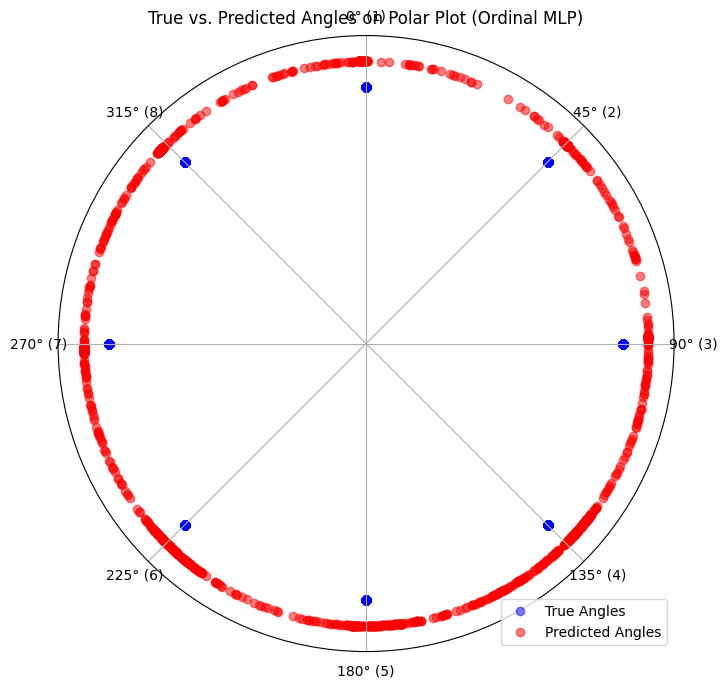

In [ ]:
# Create a polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Plot true angles
ax.scatter(true_angles_radians, np.ones_like(true_angles_radians), color='blue', label='True Angles', alpha=0.5)

# Plot predicted angles
ax.scatter(predicted_angles_radians, np.ones_like(predicted_angles_radians) * 1.1, color='red', label='Predicted Angles', alpha=0.5) # Offset slightly for visibility

# Set the direction of 0 degrees to be upwards (North) and clockwise
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Set the angular ticks to represent the 8 directions (1-8)
# Map radians back to dirbin labels for tick labels
# class_center_angles_radians = np.deg2rad(np.arange(num_classes) * (360.0 / num_classes))
# tick_angles = class_center_angles_radians
# tick_labels = [str(i) for i in label_encoder.classes_]
# ax.set_xticks(tick_angles)
# ax.set_xticklabels(tick_labels)

# Alternatively, set generic degree labels
ax.set_xticks(np.linspace(0, 2 * np.pi, 8, endpoint=False))
ax.set_xticklabels(['0° (1)', '45° (2)', '90° (3)', '135° (4)', '180° (5)', '225° (6)', '270° (7)', '315° (8)'])


# Add a legend and title
ax.legend(loc='lower right')
ax.set_title("True vs. Predicted Angles on Polar Plot (Ordinal MLP)", va='bottom')

# Set radial limits (optional, just to make points visible)
ax.set_rticks([]) # Hide radial ticks
ax.set_rlim(0, 1.2) # Set radial limits

plt.show()

## Refine model and training

### Subtask:
Based on the evaluation and visualization, refine the model architecture, loss function, or training process as needed.


**Reasoning**:
Analyze the previous results and refine the model architecture and training process based on the analysis. The current model shows a low classification accuracy when converting back to bins, although the MSE on the continuous output is low. This suggests the model might be predicting angles that are close to the true angles but not consistently falling into the correct discrete bin, or that the single layer is not complex enough to capture the nuances of the data. Adding more layers and potentially more units could improve the model's capacity.



In [ ]:
# --- 1. REFINE THE ORDINAL MLP MODEL ARCHITECTURE ---
print("--- 🧠 STEP 1: Refining Ordinal MLP Model Architecture ---")

# Define a more complex MLP model architecture for ordinal classification.
# Add more hidden layers and potentially more units per layer.
ordinal_mlp_model_refined = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Increased units
    Dense(128, activation='relu'), # Added another hidden layer
    Dense(64, activation='relu'),  # Added a third hidden layer
    Dense(2, activation=None)      # Output layer for sine and cosine components
])

print("Refined Ordinal MLP Model Summary:")
ordinal_mlp_model_refined.summary()

# --- 2. COMPILE THE REFINED MODEL ---
print("\n--- ⚙️ STEP 2: Compiling Refined Ordinal MLP Model ---")

# Use the same custom loss function (Mean Squared Error for sine and cosine)
# and optimizer as before.
print("Compiling the Refined Ordinal MLP model...")
ordinal_mlp_model_refined.compile(optimizer='adam',
                                  loss=cyclical_mse_loss, # Use the previously defined custom loss
                                  metrics=['mse']) # Use Mean Squared Error as a metric

# Print the configuration of the compiled model
print("\nCompiled Refined Ordinal MLP Model Configuration:")
print("Optimizer:", ordinal_mlp_model_refined.optimizer.get_config())
print("Loss Function:", ordinal_mlp_model_refined.loss)
print("Metrics:", [m.name for m in ordinal_mlp_model_refined.metrics])

print("-" * 40, "\n")

# --- 3. TRAIN THE REFINED ORDINAL MLP MODEL ---
print("--- 🧠 STEP 3: Training Refined Ordinal MLP Model ---")

print("\nTraining the Refined Ordinal MLP model...")
history_ordinal_refined = ordinal_mlp_model_refined.fit(X_train_scaled, y_ordinal_train,
                                                        epochs=50, # Increase epochs
                                                        batch_size=32,
                                                        validation_split=0.1, # Use 10% of training data for validation
                                                        verbose=1)

print("-" * 40, "\n")

# --- 4. EVALUATE THE REFINED ORDINAL MLP MODEL ---
print("--- 📊 STEP 4: Evaluating Refined Ordinal MLP Model ---")

# Evaluate the final refined model on the unseen test set.
loss_ordinal_refined, mse_ordinal_refined = ordinal_mlp_model_refined.evaluate(X_test_scaled, y_ordinal_test, verbose=0)
print(f"\nRefined Ordinal MLP Test Loss (MSE): {loss_ordinal_refined:.4f}")
print(f"Refined Ordinal MLP Test MSE: {mse_ordinal_refined:.4f}")

print("-" * 40, "\n")

--- 🧠 STEP 1: Refining Ordinal MLP Model Architecture ---
Refined Ordinal MLP Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,794 (163.26 KB)

 Trainable params: 41,794 (163.26 KB)

 Non-trainable params: 0 (0.00 B)


--- ⚙️ STEP 2: Compiling Refined Ordinal MLP Model ---
Compiling the Refined Ordinal MLP model...

Compiled Refined Ordinal MLP Model Configuration:
Optimizer: {'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
Loss Function: <function cyclical_mse_loss at 0x7f643bd1b100>
Metrics: ['loss', 'compile_metrics']
---------------------------------------- 

--- 🧠 STEP 3: Training Refined Ordinal MLP Model ---

Training the Refined Ordinal MLP model...
Epoch 1/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1253 - mse: 0.1253 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 2/50
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0199 - val_mse: 0.0199
Epoch 3/50
410/410 